**Part 1:** 

Use the **Fashion-MNIST** dataset for this question.

1a) Load the dataset and implement the K Means algorithm. You need to find the optimal number of clusters using the
> i) elbow method

> ii) silhoette method



1b) Define the initial clusters’ centroids using:</br>
> i) Forgy</br>

> ii) Random Partition

1c) Experiment with different distance measures [Euclidean distance, Manhattan distance].

1d) Plot the error vs number of clusters graph while using the elbow method and silhouette 
    method. Report the optimal number of clusters found.


1e) Visualize the dataset to depict the clusters formed. (prefer T-SNE)

</br>
</br>
</br>
</br>


**Part 2:**
</br>
In this task, you need to implement Hierarchical clustering (agglomerative) on the same dataset.

2a) visualize a dendogram and find out the optimal number of clusters with the help of Dendogram. Explain the procedure.


2b) Implement Hierarchical clustering using: </br>
> i) single linkage

> ii) Complete linkage

>Visualize the clusters obtained using these linkages and compare. 



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [ ]:
def WCSS(X,centroid,cltID):
  k=len(centroid)
  wcss=0
  for i in range(k):
    pt=X[cltID==i]
    if len(pt)!=0:
      wcss+=np.sum((pt-centroid[i])**2)
  return wcss

### elbow

In [ ]:
#implement elbow method from scratch
def elbow(X,initmethod,distmetric,itern):
  wcsslist=[]
  for i in range(1,15):
    kmeansobj=Kmeans(i,X,initmethod,distmetric)
    kmeansobj.train(itern)
    wcsslist.append(WCSS(X,kmeansobj.centroids,kmeansobj.C))
  plt.plot([*range(1,15)],wcsslist)
  plt.title(f"Elbow Method for {initmethod} {distmetric}")
  plt.xlabel("No of clusters")
  plt.ylabel("within-cluster sums of squares (WCSS)")
  plt.show()

### silhouette

In [ ]:
def silhouette_score1(X,centroids,C):
  scores=0
  k=centroids.shape[0]
  m=X.shape[0]
  pntsin_cluster=np.zeros((m, k))
  for i in range(m):
    pntsin_cluster[i,C[i]]=1
  
  for i in range(k):
    incls=X[pntsin_cluster[:,i]==1]
    for p in incls:
      a=0
      calc=np.sqrt(np.sum(np.square(incls-p), axis=1))
      if len(calc)!=0:
        a= np.mean(calc)
      b=np.Infinity
      for j in range(k):
        if i!=j:
          outps=X[pntsin_cluster[:,j]==1]
          btemp=np.Infinity
          calcb=np.sqrt(np.sum(np.square(outps-p), axis=1))
          if len(calcb)!=0:
            btemp= np.mean(calcb)
          b=min(btemp,b)
      if max(a,b)!=0:
        scores+=(b - a)/max(a, b)
  # if m==0:
  #   print("threat")
  scores=scores/m
  return scores

In [ ]:
#implement silhouette method from scratch

def silhouette(X,initmethod,distmetric,itern):
  sslist=[]
  for i in range(7,13):
    kmeansobj=Kmeans(i,X,initmethod,distmetric)
    kmeansobj.train(itern)
    sslist.append(silhouette_score(X,kmeansobj.centroids,kmeansobj.C))
  plt.plot([*range(7,13)],sslist)
  plt.title(f"Silhouette Method for {initmethod} {distmetric}")
  plt.xlabel("No of clusters")
  plt.ylabel("silhouette_scores")
  plt.show()



In [ ]:
def forgy(X,k):
  return X[np.random.choice(range(X.shape[0]),replace=False, size=k),:]

In [ ]:
def randomPartition(X,k):
  indices=np.random.choice(range(k),replace=True,size=X.shape[0])
  mean = []
  for count in range(k):
      mean.append(X[indices == count].mean(axis=0))      
  return np.array(mean)


In [ ]:
#implement Kmeans from scratch
class Kmeans:

  def __init__(self,k,X,cinit,distmethod):
    self.k=k
    self.X=X
    self.cinit=cinit
    self.distmethod=distmethod
    if self.cinit=='forgy':
      self.centroids=forgy(self.X,self.k)
    else:
      self.centroids=randomPartition(self.X,self.k)
  
  def distmetric(self,j):
    if self.distmethod=='euclid':
      return (self.X-self.centroids[j])**2
    else:
      return np.abs(self.X-self.centroids[j])

  def train(self,itern):
    n,m=self.X.shape
    for i in range(itern):
      dist=np.array([]).reshape(n,0)
      
      for kv in range(self.k):
        temp=np.sum(self.distmetric(kv),axis=1)
        dist=np.c_[dist,temp]
      clusterID=np.argmin(dist,axis=1)
      # Y={}
      # for k in range(self.k):
      #   Y[k+1]=np.array([]).reshape(m,0)
      # for i in range(n):
      #   Y[clusterID[i]]=np.c_[Y[clusterID[i]],self.X[i]]
  
      # for k in range(self.k):
      #   Y[k+1]=Y[k+1].T
      for k in range(self.k):
        pt=self.X[clusterID==k]
        if len(pt)!=0:
          self.centroids[k]=np.mean(pt,axis=0)    
      self.C=clusterID
    print("completed",end=' ')
  

In [ ]:
from keras.datasets import fashion_mnist
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()
trainXX = trainX.reshape(trainX.shape[0], trainX.shape[1]*trainX.shape[2])
print(trainXX.shape)
# you can performs your training on train/test dataset alone if there are computational issues

4431872/4422102 [==============================] - 0s 0us/step
(60000, 784)


In [ ]:
kmeansobj=Kmeans(10,trainXX[:8000],'randomPartition','manhattan')
kmeansobj.train(200)
print(WCSS(trainXX[:8000],kmeansobj.centroids,kmeansobj.C))

completed 16905250842.527159


In [ ]:
X_dim = TSNE(n_components=2).fit_transform(trainXX[:8000])

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [ ]:
import random
r = lambda: random.randint(0,255)
colors = np.array(['#%02X%02X%02X' % (r(),r(),r()) for i in range(500)])

## Elbow Method

completed completed completed completed completed completed completed completed completed completed completed completed completed completed 

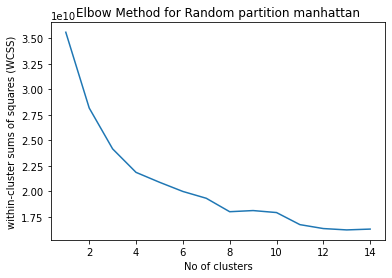

completed completed completed completed completed completed completed completed completed completed completed completed completed completed 

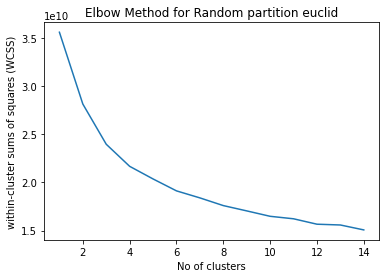

completed completed completed completed completed completed completed completed completed completed completed completed completed completed 

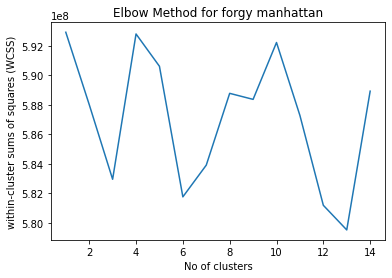

completed completed completed completed completed completed completed completed completed completed completed completed completed completed 

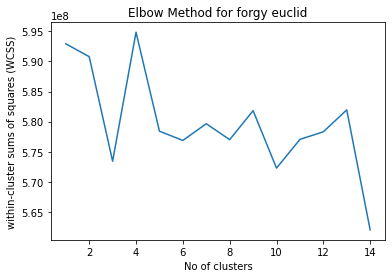

In [ ]:
XX=trainXX[:8000].copy()
for i in ['Random partition','forgy']:
  for j in ['manhattan','euclid']:
    elbow(XX,i,j,150)

From the plot of kmeans with Random Partition Initialisation and Manhattan distance we got the better cluster size as `8`.

In [ ]:
kmeansobjrm=Kmeans(8,trainXX[:8000],'randomPartition','manhattan')
kmeansobjrm.train(150)

completed 

### 1e)

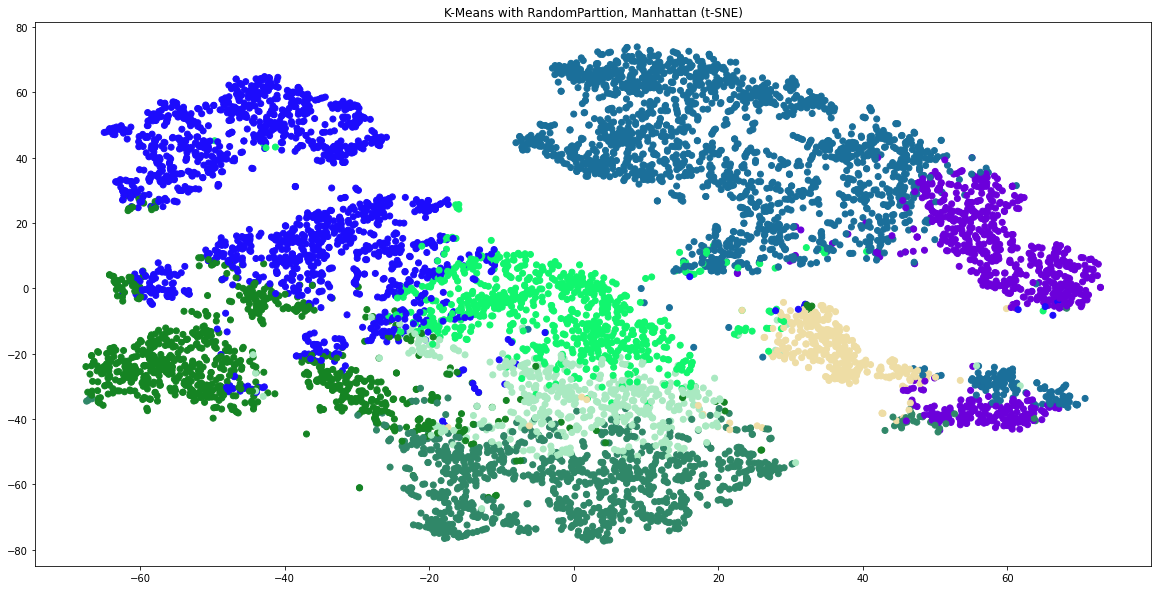

In [ ]:
fig=plt.figure(figsize=(20,10))
plt.scatter(X_dim[:,0], X_dim[:,1], c=colors[kmeansobjrm.C])
plt.title('K-Means with RandomParttion, Manhattan (t-SNE)')
plt.show()

From the plot of kmeans with Random Partition Initialisation and Euclid distance we got the better cluster size as `10`.

In [ ]:
kmeansobjrm=Kmeans(10,trainXX[:8000],'randomPartition','euclid')
kmeansobjrm.train(150)

completed 

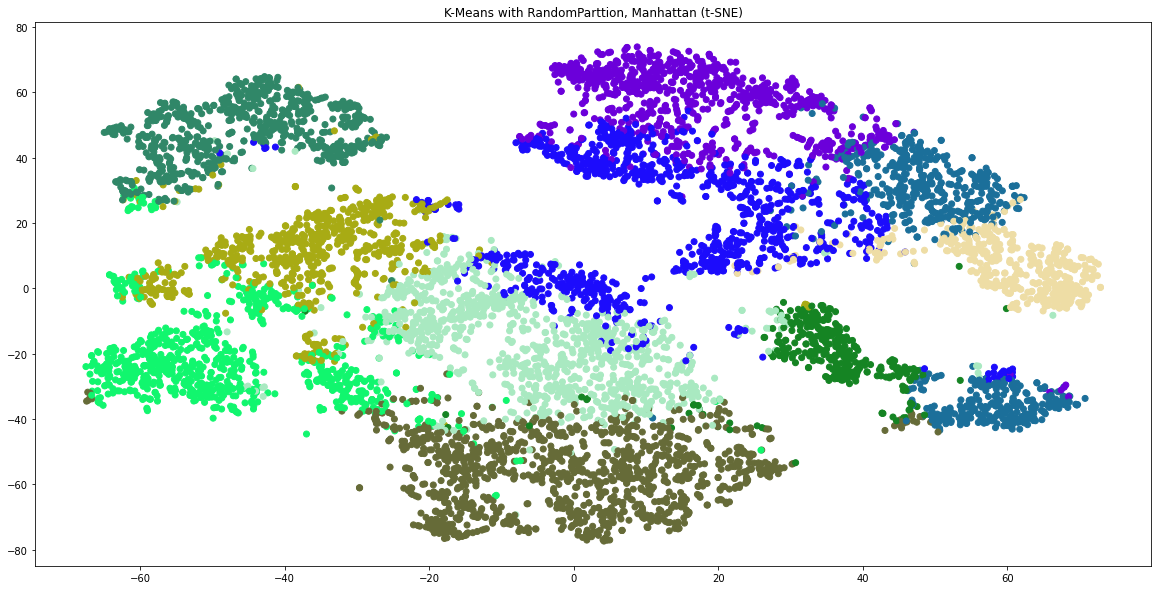

In [ ]:
fig=plt.figure(figsize=(20,10))
plt.scatter(X_dim[:,0], X_dim[:,1], c=colors[kmeansobjrm.C])
plt.title('K-Means with RandomParttion, Euclid (t-SNE)')
plt.show()

## Silhouette method

completed completed completed completed completed completed 

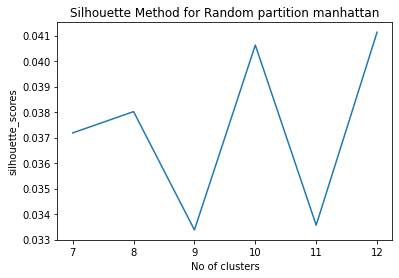

completed completed completed completed completed completed 

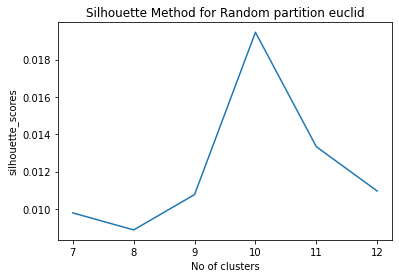

completed completed completed completed completed completed 

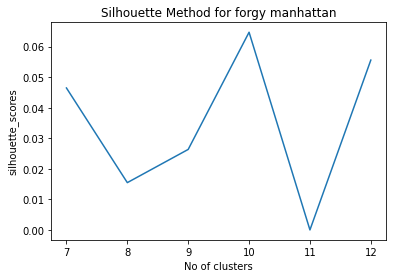

completed completed completed completed completed completed 

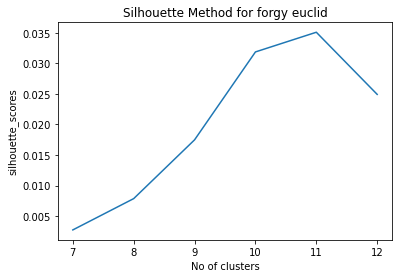

In [ ]:
XX=trainXX[:4000].copy()
for i in ['Random partition','forgy']:
  for j in ['manhattan','euclid']:
    silhouette(XX,i,j,100)

#### From silhouette graphs:

> Random Partion and Manhattan: best is 10

>Random Partion and Euclid:  best is 10

>Forgy and Manhattan: best is 10

>Forgy Partion and Euclid: best is 11

Hierarchical clustering

In [ ]:
# implement hierarchical clustering ( you can use scikit module)
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

def hierarchical_clustering(X,k,imethod):
  agglometric = AgglomerativeClustering(n_clusters = k,affinity='euclidean', linkage=imethod)
  c = agglometric.fit(X)
  return c



## Dendogram

In [ ]:
#visualize a dendogram
import scipy.cluster.hierarchy as shc
def dendogram(X,imethod):
  plt.figure(figsize =(10, 10))
  plt.title('Dendogram')
  Dendrogram = shc.dendrogram((shc.linkage(X, method =imethod)))

  

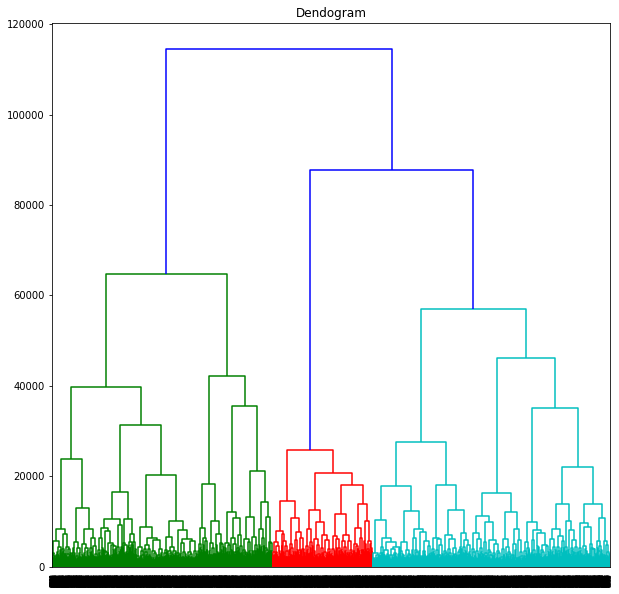

In [ ]:
dendogram(trainXX[:8000],'ward')

In [ ]:
h_C=hierarchical_clustering(trainXX[:8000],11,'ward')

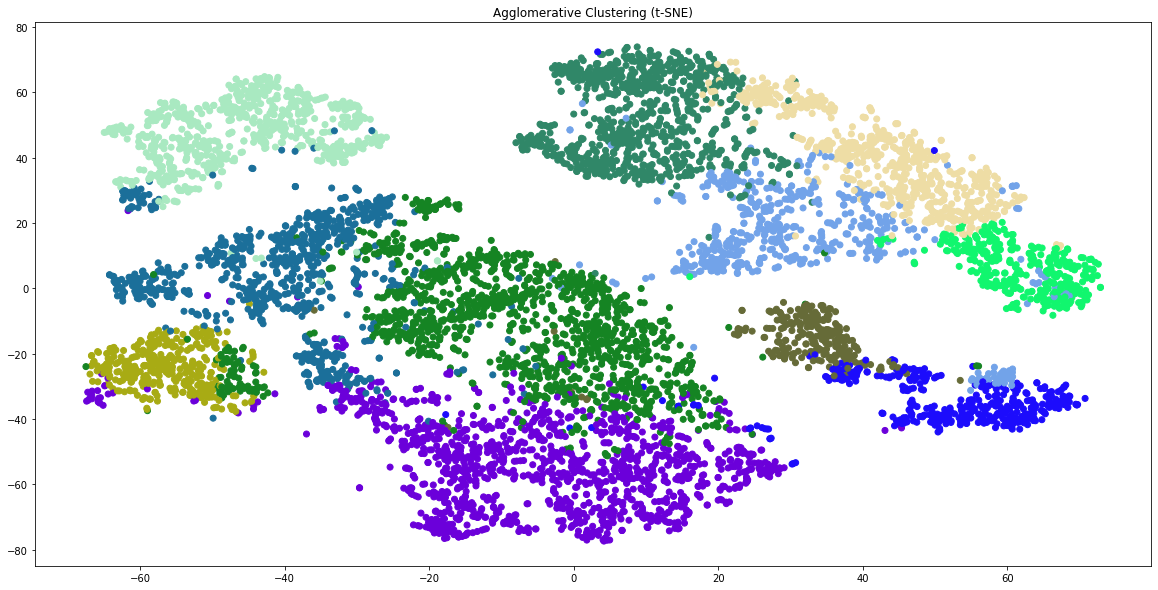

In [ ]:
fig=plt.figure(figsize=(20,10))
h_CID=h_C.labels_
plt.scatter(X_dim[:,0], X_dim[:,1], c=colors[h_CID])
plt.title('Agglomerative Clustering (t-SNE)')
plt.show()

**Question**: Explain the procedure to find the optimal number of clusters using dendogram

Answer: </br>Draw a horizontal line passing through the point which is just above the endpoint of the largest vertical distance between two nodes.
</br>The number of clusters is the number of vertical lines intersected by this line.
</br>I got 11 vertical lines intersecting the horizontal line I draw.
</br>So the optimal no of cluster size is `11`.





## Single Linkage

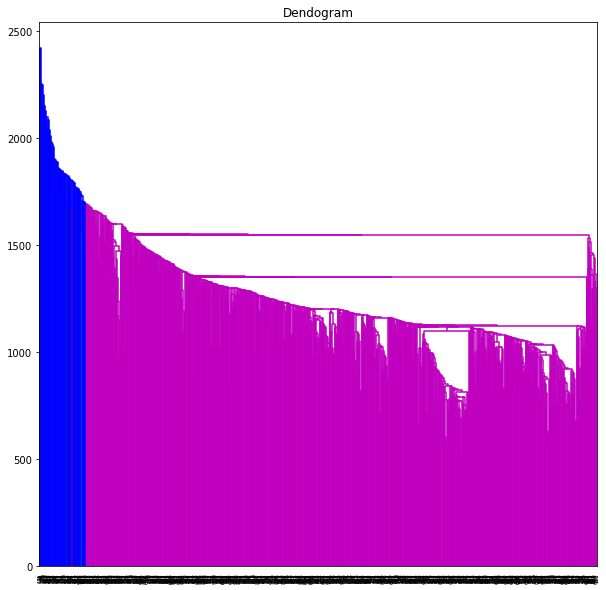

In [ ]:
dendogram(trainXX[:1000],'single')

In [ ]:
h_CS=hierarchical_clustering(trainXX[:8000],100,'single')

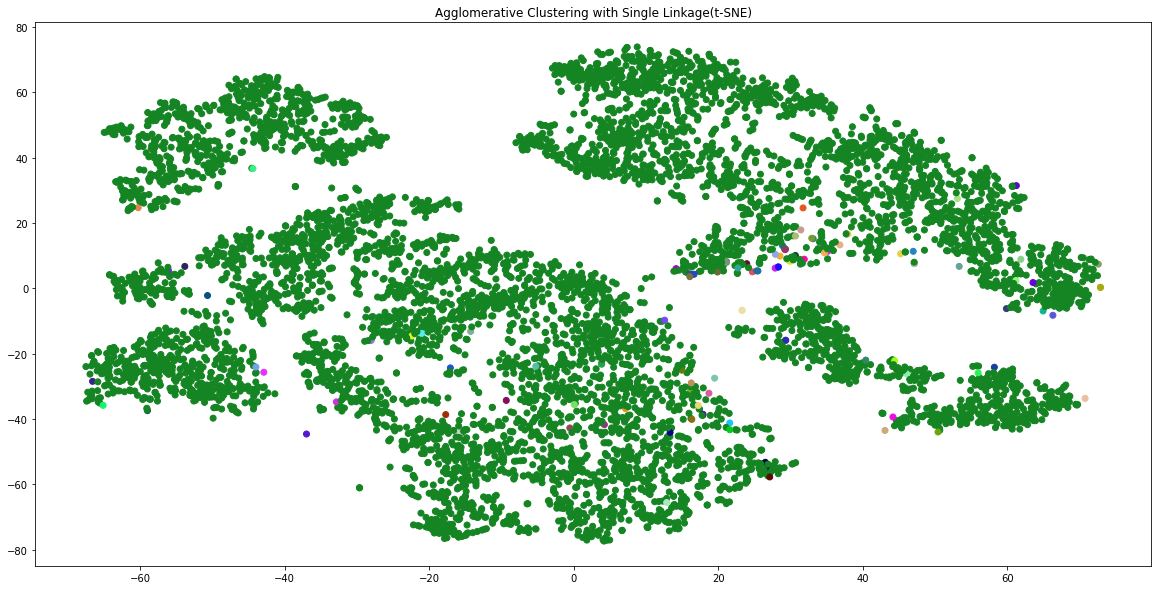

In [ ]:
fig=plt.figure(figsize=(20,10))
h_CID=h_CS.labels_
plt.scatter(X_dim[:,0], X_dim[:,1], c=colors[h_CID])
plt.title('Agglomerative Clustering with Single Linkage(t-SNE)')
plt.show()

## Complete Linkage

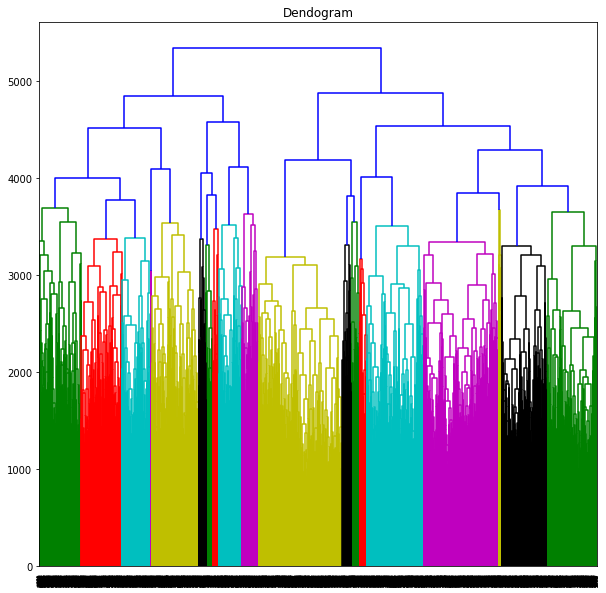

In [ ]:
dendogram(trainXX[:5000],'complete')

In [ ]:
h_CC=hierarchical_clustering(trainXX[:8000],14,'complete')

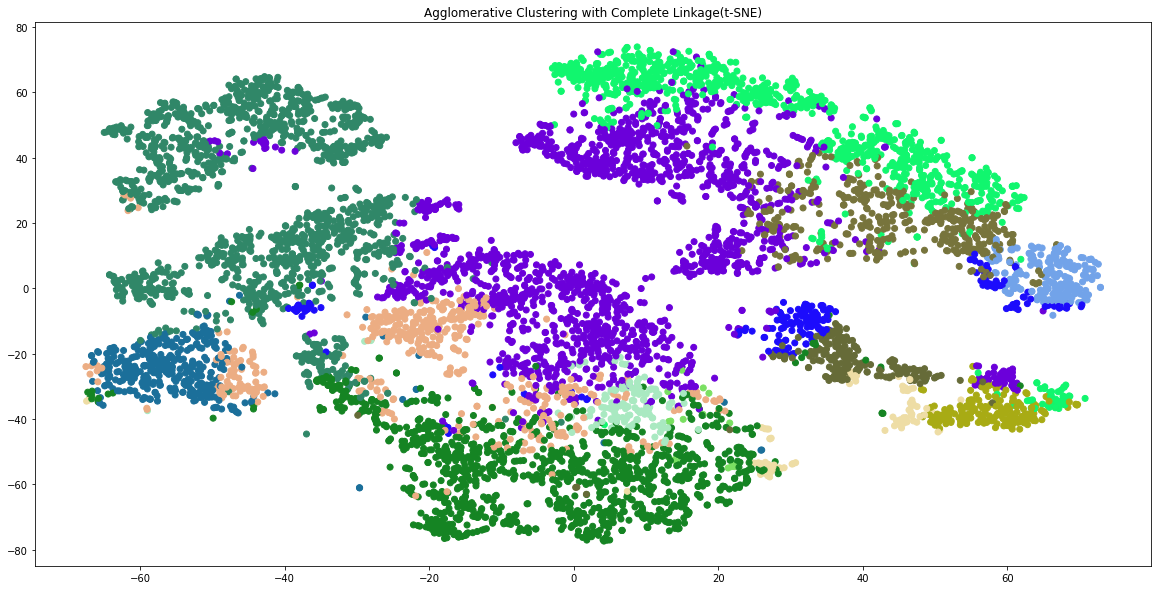

In [ ]:
fig=plt.figure(figsize=(20,10))
h_CID=h_CC.labels_
plt.scatter(X_dim[:,0], X_dim[:,1], c=colors[h_CID])
plt.title('Agglomerative Clustering with Complete Linkage(t-SNE)')
plt.show()

**Question:** Mention the differences observed using single and complete linkage:

Answer:
- We can observe the dendograms of Single linkage and Complete Linkage
- For single linkage we can see that there are so many divinings but in complete linkage they are less.  
- Single linkage focuses on minimum distance or nearest neighbour between two clusters. Complete linkage focuses on maximum distance or farthest neighbour between two clusters.
- Complete linkage avoids the chaining of clusters as in single linkage.
- Single linkage is more prone to overfitting as it focuses on minimum distance.Whereas, complete linkage is more prone to underfitting as it focuses on maximum distance.